<a href="https://colab.research.google.com/github/nadgir-praveen/data-science-lab/blob/main/assignments/M2_NB_MiniProject_2_Credit_risk_modelling_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Credit risk modelling using Logistic Regression

## Problem Statement

Predict the loan defaulters using a Logistic Regression model on the credit risk data and calculate credit scores

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration, preprocessing and visualization
* implement Logistic Regression using manual code or using sklearn library
* evaluate the model using appropriate performance metrics
* develop a credit scoring system

## Dataset

The dataset chosen for this mini-project is the [Give Me Some Credit](https://cdn.iisc.talentsprint.com/CDS/Give_me_some_credit_BigML.pdf) dataset which can be used to build models for predicting loan repayment defaulters
#### Datafields

- **SeriousDlqin2yrs:** Person experienced 90 days past due delinquency or worse
- **RevolvingUtilizationOfUnsecuredLines:** Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
- **age:** Age of borrower in years
- **NumberOfTime30-59DaysPastDueNotWorse:** Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
- **DebtRatio:** Monthly debt payments, alimony,living costs divided by monthy gross income
- **MonthlyIncome:** Monthly income
- **NumberOfOpenCreditLinesAndLoans:** Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
- **NumberOfTimes90DaysLate:** Number of times borrower has been 90 days or more past due.
- **NumberRealEstateLoansOrLines:**	Number of mortgage and real estate loans including home equity lines of credit
- **NumberOfTime60-89DaysPastDueNotWorse:**	Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
- **NumberOfDependents:** Number of dependents in family excluding themselves (spouse, children etc.)

## Information

Credit risk arises when a corporate or individual borrower fails to meet their debt obligations. From the lender's perspective, credit risk could disrupt its cash flows or increase collection costs, since the lender may be forced to hire a debt collection agency to enforce the collection. The loss may be partial or complete, where the lender incurs a loss of part of the loan or the entire loan extended to the borrower.

Credit scoring algorithms, which calculate the probability of default, are the best methods that banks use to determine whether or not a loan should be granted.

In order to build a credit scoring system, the following feature transformations are performed:

#### Weight of Evidence and Information value

Logistic regression is a commonly used technique in credit scoring for solving binary classification problems. Prior to model fitting, another iteration of variable selection is valuable to check if the newly WOE transformed variables are still good model candidates. Preferred candidate variables are those with higher information value having a linear relationship with the dependent variable, have good coverage across all categories, have a normal distribution, contain a notable overall contribution, and are relevant to the business.

**Weight of evidence** (WOE) is a powerful tool for feature representation and evaluation in data science. WOE can provide interpret able transformation to both categorical and numerical features. The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable. Since it evolved from credit scoring world, it is generally described as a measure of the separation of good and bad customers. "Bad Customers" refers to the customers who defaulted on a loan. and "Good Customers" refers to the customers who paid back loan. WOE can be calculated using the below formula:

$$WOE = ln \left( \frac{\%   of  Non\_Events}{\%   of  Events} \right)$$

Steps to calculate WOE
* For a continuous variable, split data into 10 parts (or lesser depending on the distribution).
* Calculate the number of events and non-events in each group (bin)
* Calculate the % of events and % of non-events in each group.
* Calculate WOE by taking natural log of division of % of non-events and % of events

**Information value** is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance. The IV is calculated using the following formula :
$$IV = ∑ (\% of Non\_Events - \% of Events) * WOE$$

Read more about `WOE` and `IV` from the following [link](https://medium.com/@yanhuiliu104/credit-scoring-scorecard-development-process-8554c3492b2b)

## Grading = 10 Points

### Download the dataset

In [ ]:
#@title Download Dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/GiveMeSomeCredit.csv
!pip -qq install xverse
print("Data Downloaded Successfully!")

Data Downloaded Successfully!


### Install Packages

In [ ]:
!pip install pandas==1.3.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 44.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.21.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 1.3.5 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 1.3.5 which is incompatible.
plotnine 0.12.4 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.
xarray 2023.7.0 requires pandas>=1.4, but you have pandas 1.3.5 which is incompatible.


In [ ]:
#!pip install --upgrade pandas

In [ ]:
!pip install xverse

### Import Neccesary Packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt
import math
from xverse.transformer import MonotonicBinning,WOE
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load the dataset

In [ ]:
# YOUR CODE HERE
credit = pd.read_csv('/content/GiveMeSomeCredit.csv')

In [ ]:
credit.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


#### Describe the all statistical properties of the train dataset

In [ ]:
# YOUR CODE HERE
credit.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

### Pre-processing (1 point)

#### Remove unwanted columns

In [ ]:
# YOUR CODE HERE
credit.drop(['Unnamed: 0'], axis=1,inplace=True)

#### Handle the missing data

Find the how many null values in the dataset and fill with mean or remove.

In [ ]:
# YOUR CODE HERE
credit.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [ ]:
#credit.dropna(subset=['NumberOfDependents'], inplace=True)
credit['NumberOfDependents'].replace([np.nan], credit['NumberOfDependents'].mode()[0], inplace=True)

In [ ]:
mean_value = credit['MonthlyIncome'].mean()

In [ ]:
credit['MonthlyIncome'].fillna(value= mean_value,inplace=True)

In [ ]:
credit.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [ ]:
credit.shape

(150000, 11)

In [ ]:
credit['RevolvingUtilizationOfUnsecuredLines'] = credit['RevolvingUtilizationOfUnsecuredLines'].apply(lambda x : 1 if (x>1) else x)

In [ ]:
credit['RevolvingUtilizationOfUnsecuredLines'].max()

1.0

In [ ]:
credit['RevolvingUtilizationOfUnsecuredLines'].nunique()

122595

### EDA &  Visualization ( 1 point)

#### Calculate the percentage of the target lebels and visualize with a graph

In [ ]:
# YOUR CODE HERE
class_per = credit['SeriousDlqin2yrs'].value_counts()/len(credit) * 100
class_per = class_per.reset_index()

In [ ]:
class_per

,index,SeriousDlqin2yrs
0,0,93.316
1,1,6.684


In [ ]:
class_per.index

RangeIndex(start=0, stop=2, step=1)

In [ ]:
class_per.values

array([[ 0.   , 93.316],
       [ 1.   ,  6.684]])

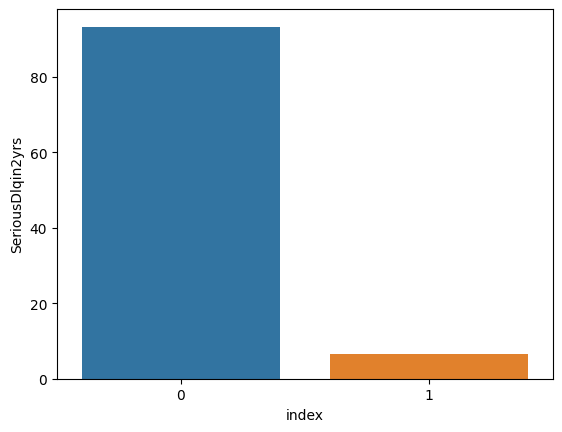

In [ ]:
sns.barplot(x = class_per['index'],y = class_per['SeriousDlqin2yrs'],data=class_per,palette = 'tab10')
plt.show()

#### Plot the distribution of SeriousDlqin2yrs by age

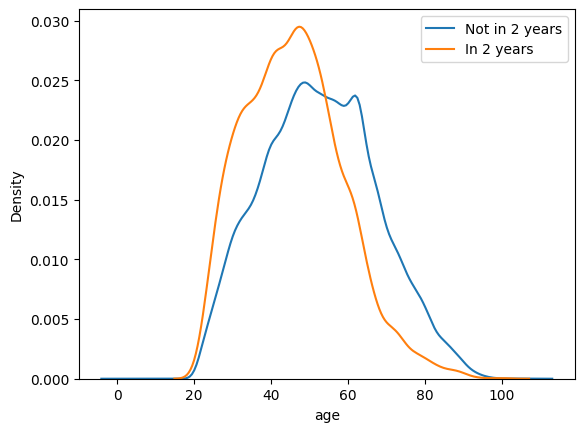

In [ ]:
# YOUR CODE HERE

#sns.displot(x = 'age',hue = 'SeriousDlqin2yrs',data = credit,kind = 'kde')
sns.kdeplot(credit[credit["SeriousDlqin2yrs"] == 0]["age"], label="Not in 2 years")
sns.kdeplot(credit[credit["SeriousDlqin2yrs"] == 1]["age"], label="In 2 years")
plt.legend()
plt.show()

#### Calculate the correlation and plot the heatmap

<Axes: >

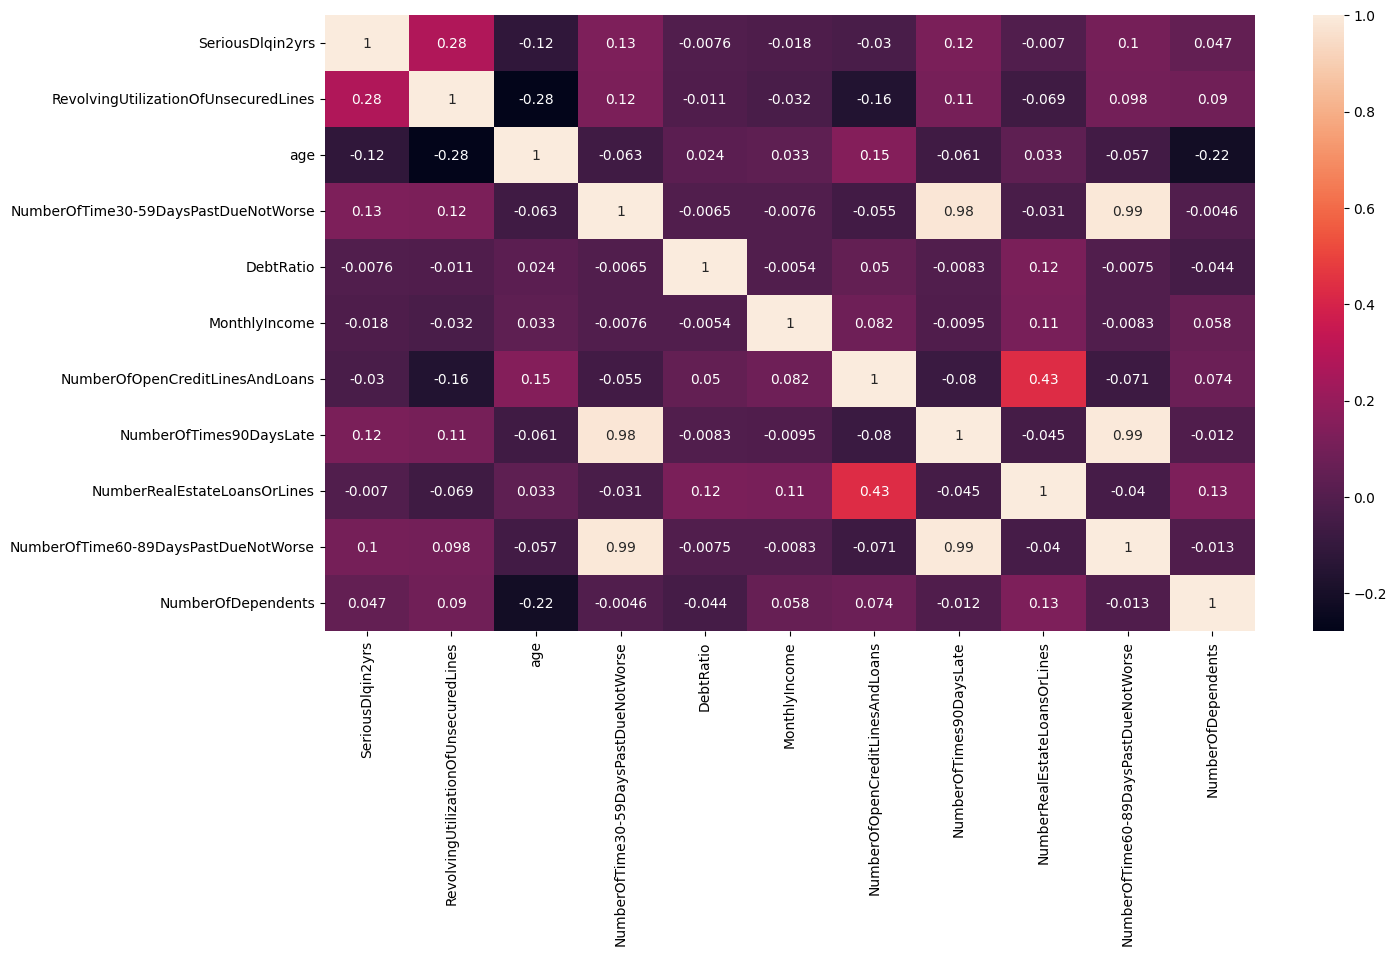

In [ ]:
# YOUR CODE HER
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(credit.corr(),annot=True)

### Data Engineering (2 points)

#### Weight of Evidence and Information value

* Arrange the binning for each variable with different bins
    * For eg. Age = 49, Age_quantile_range = (48, 56)
* Calculate information value and chooose the best features based on the rules given below

| Information Value |	Variable Predictiveness |
| --- | --- |
| Less than 0.02	|  Not useful for prediction |
| 0.02 to 0.1	| Weak predictive Power |
|  0.1 to 0.3 | Medium predictive Power |
| 0.3 to 0.5 | Strong predictive Power |
| >0.5 | Suspicious Predictive Power |

* Calculate Weight of evidence for the selected variables

Hint: Use [xverse](https://towardsdatascience.com/introducing-xverse-a-python-package-for-feature-selection-and-transformation-17193cdcd067). It is a machine learning Python module in the space of feature engineering, feature transformation and feature selection. It provides pre-built functions for the above steps, such as binning and conversion to WoE.

In [ ]:
# YOUR CODE HERE
clf = MonotonicBinning()
mb = clf.fit(credit.iloc[:,1:],credit.iloc[:,0])
mb_f = clf.transform(credit.iloc[:,1:])
print(mb_f)

       RevolvingUtilizationOfUnsecuredLines             age  \
0                               (0.38, 1.0]  (-0.001, 45.0]   
1                               (0.38, 1.0]  (-0.001, 45.0]   
2                               (0.38, 1.0]  (-0.001, 45.0]   
3                            (0.0544, 0.38]  (-0.001, 45.0]   
4                               (0.38, 1.0]    (45.0, 59.0]   
...                                     ...             ...   
149995                     (-0.001, 0.0544]   (59.0, 109.0]   
149996                       (0.0544, 0.38]  (-0.001, 45.0]   
149997                       (0.0544, 0.38]    (45.0, 59.0]   
149998                     (-0.001, 0.0544]  (-0.001, 45.0]   
149999                          (0.38, 1.0]   (59.0, 109.0]   

       NumberOfTime30-59DaysPastDueNotWorse         DebtRatio  \
0                               (1.0, 98.0]  (0.57, 329664.0]   
1                             (-0.001, 1.0]   (-0.001, 0.238]   
2                             (-0.001, 1.0]   (-

In [ ]:
#splitting using xverse
from xverse.feature_subset import SplitXY

clf = SplitXY(['SeriousDlqin2yrs']) #Split the dataset into X and y
features,target = clf.fit_transform(credit)

In [ ]:
from xverse.transformer import MonotonicBinning

clf = MonotonicBinning()
clf.fit(features,target)
clf.bins

{'DebtRatio': array([0.00000000e+00, 2.38192456e-01, 5.69938302e-01, 3.29664000e+05]),
 'MonthlyIncome': array([      0.        ,    4700.        ,    6670.22123739,
        3008750.        ]),
 'NumberOfDependents': array([ 0.,  1., 20.]),
 'NumberOfOpenCreditLinesAndLoans': array([ 0.,  6., 10., 58.]),
 'NumberOfTime30-59DaysPastDueNotWorse': array([ 0.,  1., 98.]),
 'NumberOfTime60-89DaysPastDueNotWorse': array([ 0.,  1., 98.]),
 'NumberOfTimes90DaysLate': array([ 0.,  1., 98.]),
 'NumberRealEstateLoansOrLines': array([ 0.,  1., 54.]),
 'RevolvingUtilizationOfUnsecuredLines': array([0.        , 0.05441989, 0.3799455 , 1.        ]),
 'age': array([  0.,  45.,  59., 109.])}

In [ ]:
output_bins = clf.bins #will be used later in this exercise
out_X = clf.transform(features)
out_X.head()

,DebtRatio,MonthlyIncome,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,RevolvingUtilizationOfUnsecuredLines,age
0,"(0.57, 329664.0]","(6670.221, 3008750.0]","(1.0, 20.0]","(10.0, 58.0]","(1.0, 98.0]","(-0.001, 1.0]","(-0.001, 1.0]","(1.0, 54.0]","(0.38, 1.0]","(-0.001, 45.0]"
1,"(-0.001, 0.238]","(-0.001, 4700.0]","(-0.001, 1.0]","(-0.001, 6.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(0.38, 1.0]","(-0.001, 45.0]"
2,"(-0.001, 0.238]","(-0.001, 4700.0]","(-0.001, 1.0]","(-0.001, 6.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(0.38, 1.0]","(-0.001, 45.0]"
3,"(-0.001, 0.238]","(-0.001, 4700.0]","(-0.001, 1.0]","(-0.001, 6.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(0.0544, 0.38]","(-0.001, 45.0]"
4,"(-0.001, 0.238]","(6670.221, 3008750.0]","(-0.001, 1.0]","(6.0, 10.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(0.38, 1.0]","(45.0, 59.0]"


In [ ]:
#To find WOE
clf2 = WOE()
woe = clf2.fit(credit.iloc[:,1:],credit.iloc[:,0])
woe1 = clf2.transform(credit.iloc[:,1:])
woe1

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.916188,0.414666,1.901126,0.146810,-0.336321,-0.043992,-0.176674,-0.066080,-0.09799,0.269384
1,0.916188,0.414666,-0.257826,-0.108543,0.300624,0.161831,-0.176674,0.024285,-0.09799,-0.088266
2,0.916188,0.414666,-0.257826,-0.108543,0.300624,0.161831,-0.176674,0.024285,-0.09799,-0.088266
3,-0.802015,0.414666,-0.257826,-0.108543,0.300624,0.161831,-0.176674,0.024285,-0.09799,-0.088266
4,0.916188,0.043658,-0.257826,-0.108543,-0.336321,-0.200293,-0.176674,0.024285,-0.09799,-0.088266
...,...,...,...,...,...,...,...,...,...,...
149995,-1.389301,-0.804528,-0.257826,-0.108543,0.300624,0.161831,-0.176674,0.024285,-0.09799,-0.088266
149996,-0.802015,0.414666,-0.257826,0.146810,-0.081528,0.161831,-0.176674,0.024285,-0.09799,0.269384
149997,-0.802015,0.043658,-0.257826,0.146810,-0.081528,-0.043992,-0.176674,0.024285,-0.09799,-0.088266
149998,-1.389301,0.414666,-0.257826,-0.108543,-0.081528,0.161831,-0.176674,0.024285,-0.09799,-0.088266


###Whether to includeRevolvingUtilizationOfUnsecuredLines or not

In [ ]:
#finding information value
clf2.iv_df

,Variable_Name,Information_Value
8,RevolvingUtilizationOfUnsecuredLines,0.935429
6,NumberOfTimes90DaysLate,0.484202
4,NumberOfTime30-59DaysPastDueNotWorse,0.471831
5,NumberOfTime60-89DaysPastDueNotWorse,0.264824
9,age,0.219843
1,MonthlyIncome,0.065725
2,NumberOfDependents,0.023730
3,NumberOfOpenCreditLinesAndLoans,0.023300
0,DebtRatio,0.012360
7,NumberRealEstateLoansOrLines,0.001605


In [ ]:
selected_columns = clf2.iv_df.Variable_Name.values[:5]
selected_columns

array(['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTimes90DaysLate',
       'NumberOfTime30-59DaysPastDueNotWorse',
       'NumberOfTime60-89DaysPastDueNotWorse', 'age'], dtype=object)

### Identify features,  target and split it into train and test

In [ ]:
len(selected_columns),len(woe1.columns)

(5, 10)

In [ ]:
# YOUR CODE HERE
X = woe1[selected_columns]
y = credit['SeriousDlqin2yrs']
print(X.shape,y.shape)

(150000, 5) (150000,)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=66)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120000, 5), (30000, 5), (120000,), (30000,))

### Logistic Regression from scratch using gradient method (2 points)

For Linear Regression, we had the hypothesis $yhat = w.X +b$ , whose output range was the set of all Real Numbers.
Now, for Logistic Regression our hypothesis is  $yhat = sigmoid(w.X + b)$ , whose output range is between 0 and 1 because by applying a sigmoid function, we always output a number between 0 and 1.

$yhat = \frac{1}{1 +e^{-(w.x+b)}}$

Hint: [logistic-regression-with-python](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/odsc%20%20Logistic.pdf)

In [ ]:
# YOUR CODE HERE
b = np.ones((X_train.shape[0],1))
x_train = np.concatenate((b,X_train),axis=1)
w = np.zeros(x_train.shape[1])


In [ ]:
w.shape

(6,)

In [ ]:
def sigmoid_1(x,weights):
    z = np.dot(x,weights)
    return 1/(1+np.exp(-z))

In [ ]:
from sklearn.metrics import mean_squared_error

def fit(x,y,weights,lr,iterations):
    for i in range(iterations):
        sigma = sigmoid_1(x,weights)
        loss = mean_squared_error(sigma,y)
        dw = np.dot(x.T,(sigma-y))/y.shape[0]
        weights -= lr*dw
    return weights

In [ ]:
update_weights = fit(x_train,y_train,w,0.1,2000)

In [ ]:
update_weights

array([-2.60569315,  0.7755647 ,  0.60360566,  0.61983411,  0.39285431,
        0.47285336])

###using mini batch gradient descent

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def initialize_parameters(features):
    return np.zeros((features, 1)), 0

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def compute_gradient(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    gradient = np.dot(X.T, (h - y)) / m
    return gradient

def mini_batch_gradient_descent(X, y, learning_rate=0.01, epochs=1, batch_size=120000):
    features = X.shape[1]
    theta, bias = initialize_parameters(features)
    m = len(y)

    for epoch in range(epochs):
        # Shuffle the data for each epoch
        permutation = np.random.permutation(m)
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]

        for i in range(0, m, batch_size):
            # Get mini-batch
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            # Compute gradient and update parameters
            gradient = compute_gradient(X_batch, y_batch, theta)
            theta -= learning_rate * gradient
            # Compute and print cost for monitoring
        cost = compute_cost(X, y, theta)
        print(f"Epoch {epoch + 1}/{epochs}, Cost: {cost}")

    return theta, bias

In [ ]:
y_mini = y_train.to_numpy()

In [ ]:
y_mini = y_mini.reshape((-1, 1))

In [ ]:
type(y_mini)

numpy.ndarray

In [ ]:
theta, bias = mini_batch_gradient_descent(x_train, y_mini)

Epoch 1/1, Cost: 0.6904896643507418


In [ ]:
def predict(x_new,weights,threshold):
    x_new = np.concatenate((np.ones((x_new.shape[0], 1)), x_new), axis=1)
    result = sigmoid_1(x_new,weights)
    result = result>=threshold
    y_pred = np.zeros(result.shape[0])
    for i in range(len(y_pred)):
        if result[i] == True:
            y_pred[i] = 1
        else:
            continue
    return y_pred

In [ ]:
def mini_predict(x_new,weights,threshold):
    x_new = np.concatenate((np.ones((x_new.shape[0], 1)), x_new), axis=1)
    result = sigmoid(x_new)
    result = result>=threshold
    y_pred = np.zeros(result.shape[0])
    for i in range(len(y_pred)):
        if result[i] == True:
            y_pred[i] = 1
        else:
            continue
    return y_pred

In [ ]:
y_pred = predict(X_test,update_weights,0.5)

In [ ]:
y_pred_mini = predict(X_test,theta,0.5)

In [ ]:
#accuracy through meansquarederror
(y_pred == y_test).sum()/len(y_pred)

0.9367

In [ ]:
#accuracy through minibatch
(y_pred_mini == y_test).sum()/len(y_pred_mini)

0.9367

### Implement the Logistic regression using sklearn (2 points)

As there is imbalance in the class distribution, add weightage to the Logistic regression.

* Find the accuracy with class weightage in Logistic regression
* Find the accuracy without class weightage in Logistic regression

Hint: [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
# With weightage
# YOUR CODE HERE
log_reg = LogisticRegression(class_weight={0:6/100, 1: 94/100})
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test),log_reg.score(X_train,y_train)

(0.6907, 0.6912583333333333)

In [ ]:
test_pred = log_reg.predict(X_test)

In [ ]:
# Without weightage
# YOUR CODE HERE
log_reg1 = LogisticRegression()
log_reg1.fit(X_train,y_train)
log_reg1.score(X_test,y_test),log_reg1.score(X_train,y_train)

(0.9367, 0.93545)

In [ ]:
test_pred1 = log_reg1.predict(X_test)

In [ ]:
log_reg.coef_,log_reg.intercept_

(array([[0.78764077, 0.69779032, 0.73113247, 0.58754869, 0.56810962]]),
 array([0.14631587]))

In [ ]:
log_reg.predict_proba(X_test)

array([[0.69634261, 0.30365739],
       [0.09008164, 0.90991836],
       [0.32428284, 0.67571716],
       ...,
       [0.85500082, 0.14499918],
       [0.78781492, 0.21218508],
       [0.85500082, 0.14499918]])

### Credit scoring (1 point)

When scaling the model into a scorecard, we will need both the Logistic Regression coefficients from model fitting as well as the transformed WoE values. We will also need to convert the score from the model from the log-odds unit to a points system.
For each independent variable Xi, its corresponding score is:

$Score = \sum_{i=1}^{n} (-(β_i × WoE_i + \frac{α}{n}) × Factor + \frac{Offset}{n})$

Where:

βi — logistic regression coefficient for the variable Xi

α — logistic regression intercept

WoE — Weight of Evidence value for variable Xi

n — number of independent variable Xi in the model

Factor, Offset — known as scaling parameter

  - Factor = pdo / ln(2); pdo is points to double the odds
  - Offset = Round_of_Score - {Factor * ln(Odds)}

In [ ]:
# Scaling factors
coef = log_reg.coef_.ravel()
intercep = log_reg.intercept_
factor = 20/np.log(2)
offset = 800 - ( factor * np.log(50))
factor, offset

(28.85390081777927, 687.1228762045055)

In [ ]:
# YOUR CODE HERE
all_score = []
for idx,row in X.iterrows():
     a = row.values * coef          # B_i * WOE_i
     a = a + (intercep/X.shape[1]) # (B_i * WOE_i) + intercept_i / n
     b = -a * factor                # -((B_i * WOE_i) + intercept_i / n) * factor
     b = b + (offset/X.shape[1])    # -((B_i * WOE_i) + intercept_i / n) * factor) + offset / n
     all_score.append(sum(b))      # sum


In [ ]:
max(all_score),min(all_score)

(738.3204972219189, 511.19092989363537)

<Axes: ylabel='Count'>

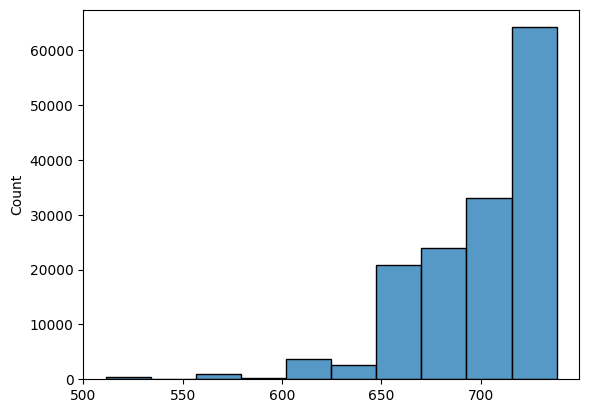

In [ ]:
sns.histplot(all_score,bins=10)

In [ ]:
len(set(all_score))

70

### Performance Metrics (1 point)

#### Precision

In [ ]:
# YOUR CODE HERE
from sklearn.metrics import precision_score
precision_score(y_test,test_pred,average='macro')

0.5674275844185547

#### Recall

In [ ]:
# YOUR CODE HERE
from sklearn.metrics import recall_score
recall_score(y_test,test_pred,average='macro')

0.749929939133809

#### Classification Report

In [ ]:
# YOUR CODE HERE
# YOUR CODE HERE
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.98      0.68      0.80     28026
           1       0.15      0.82      0.26      1974

    accuracy                           0.69     30000
   macro avg       0.57      0.75      0.53     30000
weighted avg       0.93      0.69      0.77     30000



#### Confusion matrix

In [ ]:
# YOUR CODE HERE
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,test_pred)

array([[19106,  8920],
       [  359,  1615]])

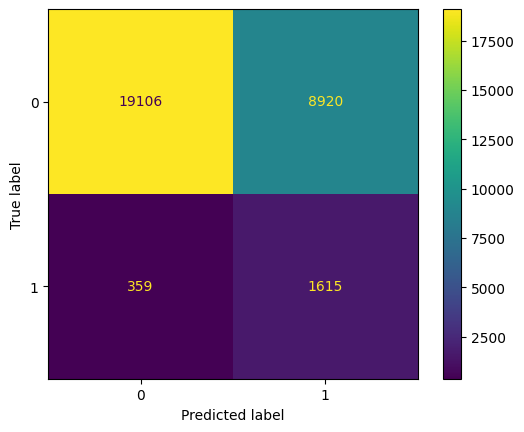

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, test_pred, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_reg.classes_)
disp.plot()
plt.show()

###Implementing Logistic regression with normal features

In [ ]:
x_normal = credit.iloc[:,1:]
y_normal = credit.iloc[:,0]

In [ ]:
xn_train, xn_test, yn_train, yn_test = train_test_split(x_normal, y_normal, test_size=0.2,random_state=42)


In [ ]:
log_reg_normal = LogisticRegression(max_iter=2000)
log_reg_normal.fit(xn_train,yn_train)
log_reg_normal.score(xn_test,yn_test),log_reg_normal.score(xn_train,yn_train)

(0.9350666666666667, 0.933875)

In [ ]:
test_pred_normal =log_reg_normal.predict(xn_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yn_test,test_pred_normal))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28044
           1       0.53      0.04      0.07      1956

    accuracy                           0.94     30000
   macro avg       0.73      0.52      0.52     30000
weighted avg       0.91      0.94      0.91     30000



###Randomised  search

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


In [ ]:
# define search space
from hyperopt import hp
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l1', 'l2', 'elasticnet']
space['C'] = [1,10,50,100]
space['max_iter']=[500,1000,2000,5000]

In [ ]:
# define search
search = RandomizedSearchCV(model, space, scoring='neg_mean_squared_error',  cv=cv)

In [ ]:
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.06455
Best Hyperparameters: {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 5000, 'C': 1}


In [ ]:
model1 = LogisticRegression(solver='newton-cg',penalty='l2',C=1, max_iter=5000)
model1.fit(X_train, y_train)
model1.score(X_test,y_test),model1.score(X_train,y_train)

(0.9367, 0.93545)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yn_test,test_pred_normal))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28044
           1       0.53      0.04      0.07      1956

    accuracy                           0.94     30000
   macro avg       0.73      0.52      0.52     30000
weighted avg       0.91      0.94      0.91     30000



In [ ]:
# YOUR CODE HERE
from sklearn.metrics import precision_score
precision_score(y_test,test_pred,average='macro')

0.5674275844185547

**Learning Curve**

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y,test_size,random_state):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size,random_state=random_state)
    train_errors, val_errors = [], []
    for m in range(1001, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

In [ ]:
#plot_learning_curves(log_reg,X_train,y_train,0.2,66)

### SHAP (SHapley Additive exPlanations)
is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions.

In [ ]:
!pip -qq install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 9.0 MB/s eta 0:00:00


In [ ]:
import shap
import warnings
warnings.filterwarnings("ignore")

### Force plot for individual instances

We can visualize feature attributions such as Shapley values as “forces”. Each feature value is a force that either increases or decreases the prediction. The prediction starts from the baseline. The baseline for Shapley values is the average of all predictions.

In the plot, each Shapley value is an arrow that pushes to increase (positive value) or decrease (negative value) the prediction. These forces balance each other out at the actual prediction of


In [ ]:
# Instead of using the whole training set to estimate expected values, we summarize with
# a set of weighted kmeans, each weighted by the number of points they represent.
xtrain_summary = shap.kmeans(X_train, 10)      # summarize the background as K samples

In [ ]:
feature_names = selected_columns.tolist()

In [ ]:
# Force plot for an instance
shap.initjs()
explainer = shap.KernelExplainer(log_reg1.predict, xtrain_summary)
shap_value = explainer.shap_values(X_test.iloc[0,:].values)
shap.force_plot(explainer.expected_value, shap_value, X_test.iloc[0,:].values, feature_names = feature_names)

In the above plot:

- The output value **f(x)** is the prediction for that observation (the predicted output value of the first row in X_test is ≈ **0**, indicating low credit risk).
- The **base value**: is “the value that would be predicted if we did not know any features for the current output.” Here it is **0.004808**.
- Red/blue: Features that push the prediction value higher (to the right) are shown in red, and those pushing the prediction value lower are in blue.

The features are having risk decreasing effects.

In [ ]:
# Force plot for another instance
shap.initjs()
explainer = shap.KernelExplainer(log_reg1.predict, xtrain_summary)
shap_value = explainer.shap_values(X_test.iloc[1,:].values)
shap.force_plot(explainer.expected_value, shap_value, X_test.iloc[1,:].values, feature_names = feature_names)

### SHAP Feature Importance

The idea behind SHAP feature importance is simple: Features with large **absolute** Shapley values are important. Since we want the global importance, we average the absolute Shapley values per feature across the data. Next, we sort the features by decreasing importance and plot them.

Let's plot the SHAP feature importance for the logistic regression model trained before for predicting credit risk.

Here, we use the `shap.summary_plot` function with `plot_type=”bar”` to produce the feature importance plot. It lists the most significant features in descending order. The top variables contribute more to the model than the bottom ones and thus have high predictive power.

In [ ]:
# Get SHAP values
shap_values = explainer.shap_values(X_test)

  0%|          | 0/30000 [00:00<?, ?it/s]

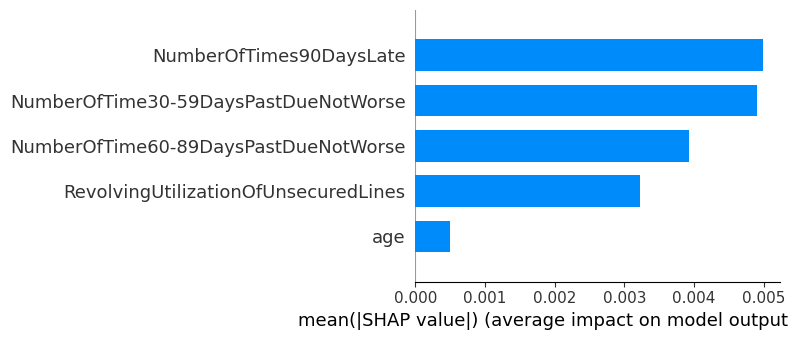

In [ ]:
# Feature importance
shap.summary_plot(shap_values, X_test, feature_names = feature_names, plot_type = "bar")

### SHAP Summary Plot

The summary plot combines feature importance with feature effects:

* Each point on the summary plot is a Shapley value for a feature and an instance.
* The position on the y-axis is determined by the feature and on the x-axis by the Shapley value.
* Overlapping points are jittered in y-axis direction, so we get a sense of the distribution of the Shapley values per feature.

Feature importance: Features are ranked in descending order.
Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
Original value: Color shows whether that feature value is high (in red) or low (in blue) for that observation.
Correlation: A high level of the “NumberOfTimes90DaysLate” has a positive impact on the credit risk. The “high” comes from the red color, and the “positive” impact

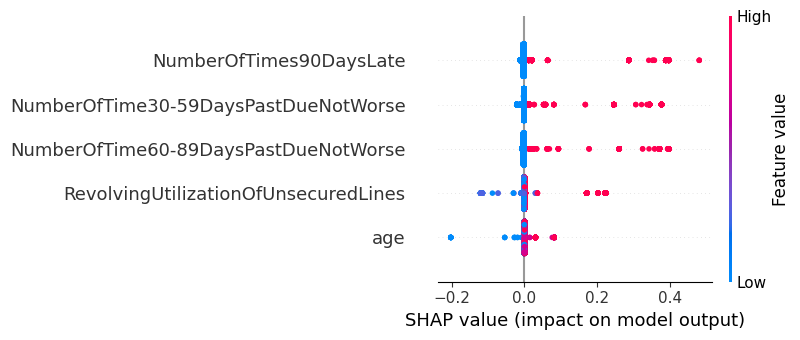

In [ ]:
# Summary plot
shap.summary_plot(shap_values, X_test, feature_names = feature_names, plot_type = "dot")

In the summary plot, we see first indications of the relationship between the value of a feature and the impact on the prediction. But to see the exact form of the relationship, we have to look at SHAP dependence plots.

The partial dependence plot shows the marginal effect of one or two features have on the predicted outcome of a machine learning model. It tells whether the relationship between the target and a feature is linear, monotonic or more complex.

To implement SHAP feature dependence plot:

* Pick a feature
* For each data instance, plot a point with the feature value on the x-axis and the corresponding Shapley value on the y-axis

In order to create a dependence plot, we use `shap.dependence_plot()`

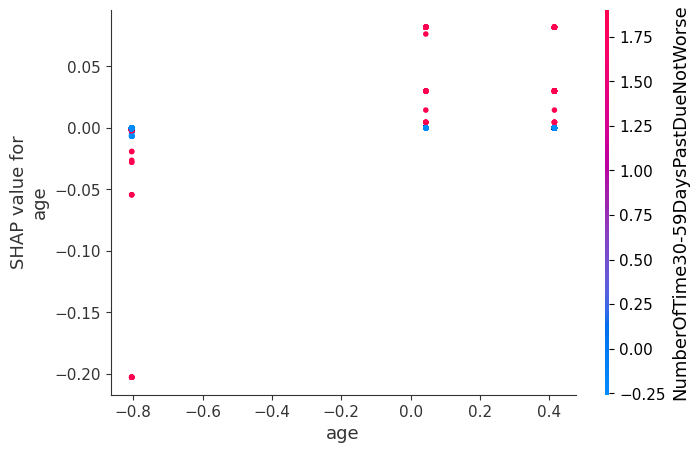

In [ ]:
# Dependence plot for temperature
shap.dependence_plot("age", shap_values, X_test)

### Report Analysis

* Comment on the performance of the model with weightage and without weightage
* Have you tried implementing Logistic regression with normal features instead of WOE ?
  - Compare the classification report for both implementations